# CEE 690-02

# Environmental Spatial Data Analysis

# Vector data

# Vector data

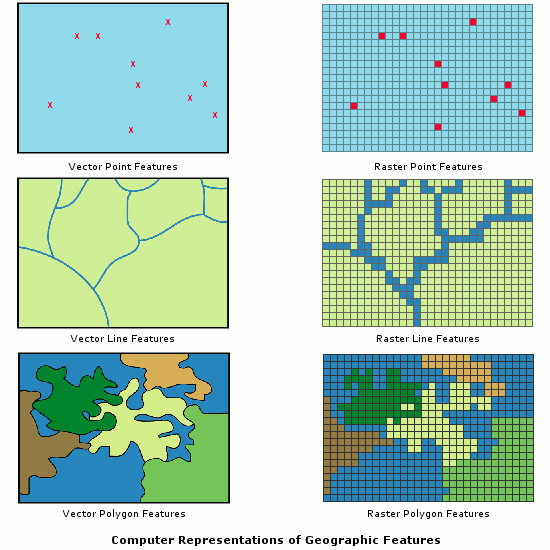

* Shapefiles and geodatabases are vector databases
* For each polygon, there are a set of attributes/properties
* Not as easy as regular grid datasets. However, they do have their place.

# Vector file formats

In [1]:
%%HTML
<iframe src='https://gdal.org/drivers/vector/index.html', width=700, height=600></iframe>

# Vector data example: HydroLakes

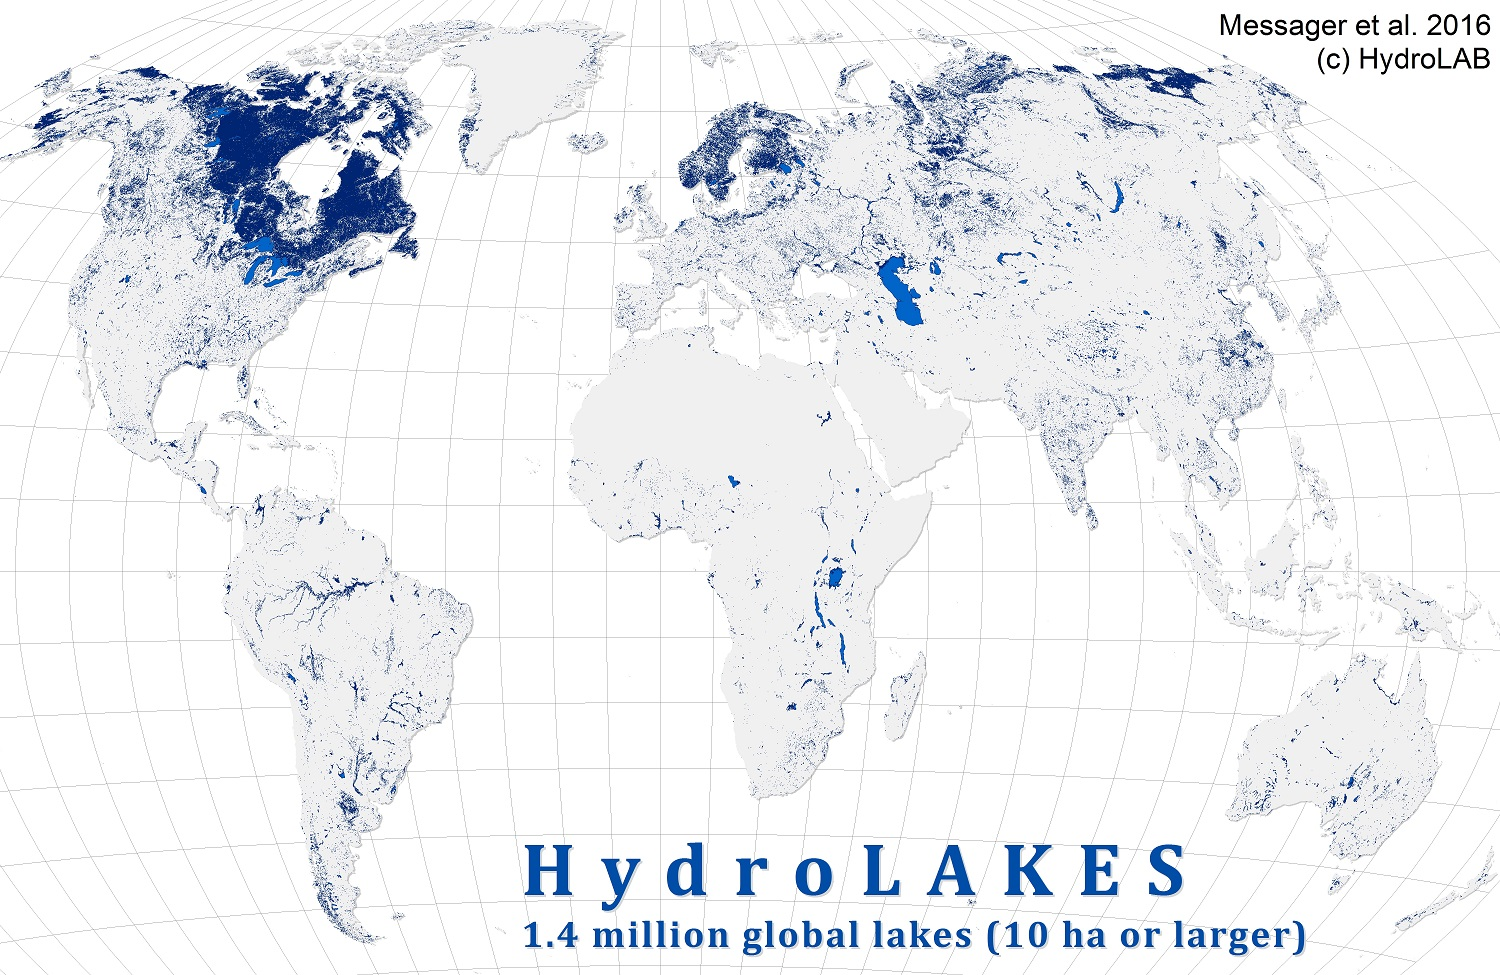

The data is saved as polygons not a regular grid. You can then save/access attributes per polygon.

# There is more to GDAL than you thought...

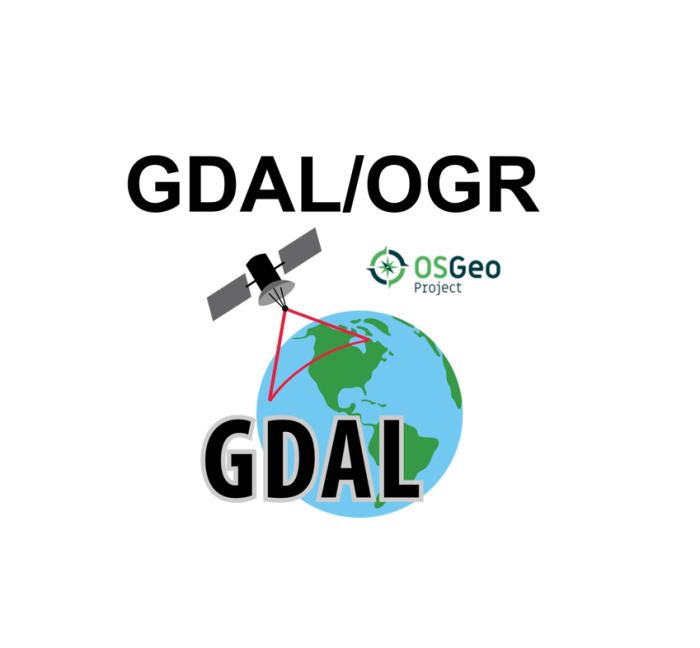

# ogrinfo

General information about a vector database

In [2]:
%%HTML
<iframe src='https://gdal.org/programs/ogrinfo.html', width=700, height=600></iframe>

In [3]:
%%bash
ogrinfo -so /data/HydroLakes/HydroLAKES_polys_v10.gdb HydroLAKES_polys_v10

INFO: Open of `/data/HydroLakes/HydroLAKES_polys_v10.gdb'
      using driver `OpenFileGDB' successful.

Layer name: HydroLAKES_polys_v10
Geometry: Multi Polygon
Feature Count: 1427688
Extent: (-180.000000, -55.865139) - (180.000000, 83.575951)
Layer SRS WKT:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
FID Column = OBJECTID
Geometry Column = Shape
Hylak_id: Integer (0.0)
Lake_name: String (40.0)
Country: String (35.0)
Continent: String (15.0)
Poly_src: String (10.0)
Lake_type: Integer(Int16) (0.0)
Grand_id: Integer(Int16) (0.0)
Lake_area: Real(Float32) (0.0)
Shore_len: Real(Float32) (0.0)
Shore_dev: Real(Float32) (0.0)
Vol_total: Real(Float32) (0.0)
Vol_res: Real(Float32) (0.0)
Vol_src: Integer(Int16) (0.0)
De

# OGR formats

In [4]:
%%HTML
<iframe src='https://gdal.org/drivers/vector/index.html', width=700, height=600></iframe>

# Let's look at lakes around Durham

In [73]:
%%bash 
ogrinfo -spat -80.0 35.0 -78.0 37.0 /data/HydroLakes/HydroLAKES_polys_v10.gdb HydroLAKES_polys_v10

INFO: Open of `/data/HydroLakes/HydroLAKES_polys_v10.gdb'
      using driver `OpenFileGDB' successful.

Layer name: HydroLAKES_polys_v10
Geometry: Multi Polygon
Feature Count: 179
Extent: (-180.000000, -55.865139) - (180.000000, 83.575951)
Layer SRS WKT:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
FID Column = OBJECTID
Geometry Column = Shape
Hylak_id: Integer (0.0)
Lake_name: String (40.0)
Country: String (35.0)
Continent: String (15.0)
Poly_src: String (10.0)
Lake_type: Integer(Int16) (0.0)
Grand_id: Integer(Int16) (0.0)
Lake_area: Real(Float32) (0.0)
Shore_len: Real(Float32) (0.0)
Shore_dev: Real(Float32) (0.0)
Vol_total: Real(Float32) (0.0)
Vol_res: Real(Float32) (0.0)
Vol_src: Integer(Int16) (0.0)
Depth_

# ogr2ogr

Alter an existing vector database (e.g., subset or reproject) 

In [74]:
%%HTML
<iframe src='https://gdal.org/programs/ogr2ogr.html', width=700, height=600></iframe>

# Let's create a new shapefile with the data around Durham

In [95]:
%%bash 
ogr2ogr -spat -79.5 35.5 -78.5 36.5 ../Workspace/HydroLakes_Durham.shp /data/HydroLakes/HydroLAKES_polys_v10.gdb

Warning 6: Normalized/laundered field name: 'Shape_Length' to 'Shape_Leng'


# gdal_rasterize

Rasterize a vector database

In [96]:
%%HTML
<iframe src='https://gdal.org/programs/gdal_rasterize.html', width=700, height=600></iframe>

# Let's rasterize the polygons

* We will set each rasterized polygon to the lake id value

In [97]:
%%bash 
ogrinfo -so ../Workspace/HydroLakes_Durham.shp HydroLakes_Durham

INFO: Open of `../Workspace/HydroLakes_Durham.shp'
      using driver `ESRI Shapefile' successful.

Layer name: HydroLakes_Durham
Metadata:
  DBF_DATE_LAST_UPDATE=2020-09-24
Geometry: Polygon
Feature Count: 61
Extent: (-79.498073, 35.510833) - (-78.516043, 36.537080)
Layer SRS WKT:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
Hylak_id: Integer (9.0)
Lake_name: String (40.0)
Country: String (35.0)
Continent: String (15.0)
Poly_src: String (10.0)
Lake_type: Integer (9.0)
Grand_id: Integer (9.0)
Lake_area: Real (24.15)
Shore_len: Real (24.15)
Shore_dev: Real (24.15)
Vol_total: Real (24.15)
Vol_res: Real (24.15)
Vol_src: Integer (9.0)
Depth_avg: Real (24.15)
Dis_avg: Real (24.15)
Res_time: Real (24.15)
Elevation: 

In [98]:
%%bash 
gdal_rasterize -l HydroLakes_Durham -a Hylak_id -tr 0.001 0.001 \
../Workspace/HydroLakes_Durham.shp ../Workspace/HydroLakes_Durham_Hylak_id.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


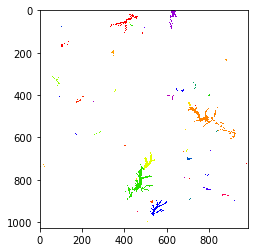

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import rasterio
import numpy as np
data = rasterio.open('../Workspace/HydroLakes_Durham_Hylak_id.tif').read(1)
#Reorder from 1 to nlakes
ulakes = np.unique(data)[1:]
for ilake in range(ulakes.size):
    data[data == ulakes[ilake]] = ilake+1
#Mask out non-lake area
data = np.ma.masked_array(data,data==0)
plt.imshow(data,cmap='prism')
plt.show()

# gdal_polygonize

Polygonize a raster

In [100]:
%%HTML
<iframe src='https://gdal.org/programs/gdal_polygonize.html', width=700, height=600></iframe>

# Let's polygonize our raster data again

In [101]:
%%bash 
rm ../Workspace/HydroLakes_Durham_Hylak_id_Reproduced*
gdal_polygonize.py -8 ../Workspace/HydroLakes_Durham_Hylak_id.tif ../Workspace/HydroLakes_Durham_Hylak_id_Reproduced.shp

0...10...20...30...40...50...60...70...80...90...Creating output ../Workspace/HydroLakes_Durham_Hylak_id_Reproduced.shp of format ESRI Shapefile.
100 - done.


In [102]:
%%bash 
ogrinfo -so ../Workspace/HydroLakes_Durham_Hylak_id_Reproduced.shp HydroLakes_Durham_Hylak_id_Reproduced

INFO: Open of `../Workspace/HydroLakes_Durham_Hylak_id_Reproduced.shp'
      using driver `ESRI Shapefile' successful.

Layer name: HydroLakes_Durham_Hylak_id_Reproduced
Metadata:
  DBF_DATE_LAST_UPDATE=2020-09-24
Geometry: Polygon
Feature Count: 67
Extent: (-79.498573, 35.510580) - (-78.515573, 36.537580)
Layer SRS WKT:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
DN: Integer (9.0)


# Vector data in Python

There are many ways... We will use GeoPandas.

In [103]:
%%HTML
<iframe src='https://geopandas.org/', width=700, height=600></iframe>

# Read in vector data

In [104]:
import geopandas as gpd

#Open access to the file
fp = gpd.read_file('../Workspace/HydroLakes_Durham.shp')

In [105]:
#Display the data
fp

,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,...,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat,Shape_Leng,Shape_Area,geometry
0,9307,None,United States of America,North America,SWBD,1,0,14.140000,91.839996,6.89,...,5.159000,337.600006,126,3.51,516.799988,-79.040825,36.505972,0.926551,0.001423,POLYGON ((-79.06001383463536 36.51499999999993...
1,9333,Falls Lake,United States of America,North America,SWBD,2,1782,38.450001,177.440002,8.07,...,22.357000,652.000000,74,4.14,1983.000000,-78.582442,35.945046,1.771481,0.003845,"POLYGON ((-78.78108886718741 36.0798358832464,..."
2,9338,None,United States of America,North America,SWBD,1,0,12.940000,34.590000,2.71,...,5.996000,146.500000,68,2.13,617.700012,-79.009312,35.794546,0.334305,0.001291,POLYGON ((-78.97101345486098 35.82960177951361...
3,9344,B. Everett Jordan Lake,United States of America,North America,SWBD,2,1796,36.970001,132.970001,6.17,...,35.658001,659.200012,68,2.93,4373.899902,-79.068670,35.656806,1.317598,0.003683,POLYGON ((-79.02833869086368 35.81553548177072...
4,9349,None,United States of America,North America,SWBD,1,0,13.870000,69.120003,5.24,...,1.966000,413.799988,70,1.85,195.000000,-78.965658,35.569034,0.690292,0.001380,POLYGON ((-78.93470391167526 35.62622341579834...
5,112779,None,United States of America,North America,SWBD,1,0,9.950000,56.950001,5.09,...,1.786000,612.599976,131,3.13,151.300003,-78.872932,36.534810,0.568916,0.001001,POLYGON ((-78.87789998372386 36.53627794053801...
6,112793,None,United States of America,North America,SWBD,1,0,1.650000,18.139999,3.98,...,1.167000,94.800003,154,3.30,121.699997,-79.361747,36.385968,0.181962,0.000166,"POLYGON ((-79.36081610785581 36.3865196397569,..."
7,112799,None,United States of America,North America,SWBD,1,0,1.870000,18.000000,3.71,...,0.802000,176.899994,152,3.63,83.199997,-79.149482,36.346925,0.175967,0.000188,POLYGON ((-79.14896314832896 36.34741292317699...
8,112818,Lake Burlington,United States of America,North America,SWBD,2,1772,2.680000,22.969999,3.96,...,1.461000,351.700012,179,2.39,160.500000,-79.413255,36.178750,0.225809,0.000268,POLYGON ((-79.42722466362838 36.21499999999992...
9,112821,None,United States of America,North America,SWBD,1,0,1.190000,12.950000,3.34,...,0.887000,81.699997,115,3.28,75.199997,-78.769768,36.169838,0.127933,0.000120,"POLYGON ((-78.77807874891477 36.2002536349824,..."


# Plot all the lakes (and county boundaries)

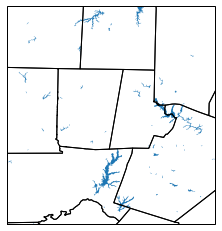

In [113]:
#Let's plot all the polygons
import cartopy
ax = plt.axes(projection = cartopy.crs.PlateCarree())
ax.add_geometries(fp.geometry, crs = cartopy.crs.PlateCarree()) # for Lat/Lon data.

#Let's superimpose the county boundaries on top to know what we are looking at
fp2 = gpd.read_file('/data/HW/HW2/workspace/NCDOT_County_Boundaries_EPSG4326.shp')
ax.add_geometries(fp2.geometry, crs = cartopy.crs.PlateCarree(),facecolor='none',edgecolor = 'black') # for Lat/Lon data.
#Extract the boundaries
bounds = fp.total_bounds
#Use the boundaries to define the map extent
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]])
#Let's look at the geometry of the data
plt.show()

# Plot the data for Falls Lake

In [121]:
#Let's only look at Falls Lake
falls_lake = fp.loc[fp.Lake_name == 'Falls Lake']
falls_lake

,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,...,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat,Shape_Leng,Shape_Area,geometry
1,9333,Falls Lake,United States of America,North America,SWBD,2,1782,38.450001,177.440002,8.07,...,22.357,652.0,74,4.14,1983.0,-78.582442,35.945046,1.771481,0.003845,"POLYGON ((-78.78108886718741 36.0798358832464,..."


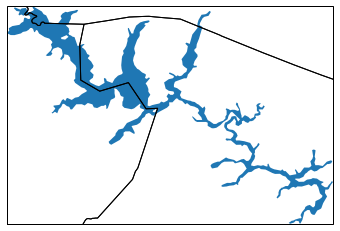

In [122]:
#Plot the data
ax = plt.axes(projection = cartopy.crs.PlateCarree())
ax.add_geometries(falls_lake.geometry, crs = cartopy.crs.PlateCarree()) # for Lat/Lon data.
#Let's superimpose the county boundaries on to know what we are looking at
fp2 = gpd.read_file('/data/HW/HW2/workspace/NCDOT_County_Boundaries_EPSG4326.shp')
#Reproject data to regular lat/lon
ax.add_geometries(fp2.geometry, crs = cartopy.crs.PlateCarree(),facecolor='none',edgecolor = 'black') # for Lat/Lon data.
bounds = falls_lake.total_bounds
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]])
#Let's look at the geometry of the data
plt.show()

# Falls Lake: Summary statistics

In [123]:
#Print the area of the polygon
print(falls_lake.area)

#Print the length of the polygon
print(falls_lake.length)

#Compute the bounding box
print(falls_lake.bounds)

1    0.003845
dtype: float64
1    1.771481
dtype: float64
        minx       miny       maxx      maxy
1 -78.805561  35.929864 -78.575356  36.08347


What do the length and area even mean?

# Reproject to equal area

In [146]:
falls_lake_ea = falls_lake.to_crs("+proj=aea +lat_1=29.5 +lat_2=45.5 +lat_0=37.5 +lon_0=-96 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs")

In [147]:
#Print the area of the polygon
print(falls_lake_ea.area)

#Print the length of the polygon
print(falls_lake_ea.length)

#Compute the bounding box
print(falls_lake_ea.bounds)

1    3.845792e+07
dtype: float64
1    177605.172264
dtype: float64
           minx          miny          maxx          maxy
1  1.526464e+06 -33951.592555  1.548825e+06 -18315.125735


# Shapely: Make your own points, lines, and polygons

In [133]:
import shapely

p1 = shapely.geometry.Point(-78.738993,36.021188,)
p2 = shapely.geometry.Point(24.952242, 60.1696017)
print(p1)
print(p2)

POINT (-78.73899299999999 36.021188)
POINT (24.952242 60.1696017)


# Is my point within Falls Lake?

In [135]:
# Is my point within the Falls Lake polygon?
print(falls_lake.geometry.contains(p1))
print(falls_lake.geometry.contains(p2))

1    True
dtype: bool
1    False
dtype: bool


# Computational geometry for GIS

In [136]:
%%HTML
<iframe src='https://shapely.readthedocs.io/en/latest/manual.html#general-attributes-and-methods', width=700, height=600></iframe>

# Computational geometry is amazing (and very hard)

But it is not the purpose of this course (nor is it my strength).

Further interest?

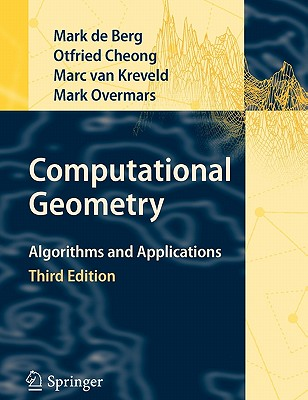

# To finish... If you want to get fancier you can superimpose the polygons on other data (e.g., elevation)

In [138]:
%%bash 
gdalwarp -overwrite -te -79.5 35.5 -78.5 36.5 -t_srs EPSG:4326 /data/NED/NED.vrt ../Workspace/dem_durham.tif

Creating output file that is 3600P x 3600L.
Processing /data/NED/NED.vrt [1/1] : 0Using internal nodata values (e.g. -99999) for image /data/NED/NED.vrt.
Copying nodata values from source /data/NED/NED.vrt to destination ../Workspace/dem_durham.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed


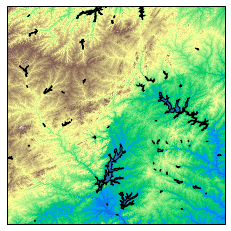

In [145]:
#Make the combinedplot
dem = rasterio.open('../Workspace/dem_durham.tif').read(1)
lakes = cartopy.io.shapereader.Reader('../Workspace/HydroLakes_Durham.shp').geometries()
img_extent = [-79.5,-78.5,35.5,36.5]
ax = plt.axes(projection=cartopy.crs.PlateCarree())
plt.imshow(dem,transform=cartopy.crs.PlateCarree(),cmap=plt.get_cmap('terrain'),extent=(img_extent))
ax.add_feature(cartopy.feature.ShapelyFeature(lakes,cartopy.crs.PlateCarree(), edgecolor='black'))
#ax.set_extent([-89.5,-89.0,45.5,46.0], ccrs.PlateCarree())
plt.show()